# Lab Work 1

Step 1 - Creating Dummy Data

In [1]:
import numpy as np
from sklearn.datasets import make_classification

# Create dummy data
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# By default, make_classification function produce features in floating point
# In this case, we want to make it as integer value

# Convert to absolute point
X = np.absolute(X)

# Round to 2 decimal place
X = np.round(X, 2) * 100

# Convert to interger
X = X.astype(int)
print(X)
print(y)

[[ 84  60]
 [ 65 351]
 [121  30]
 [113  26]
 [ 14  14]
 [208 193]
 [130  42]
 [110  91]
 [ 74  46]
 [191 162]
 [ 77  30]
 [ 61 295]
 [ 32 177]
 [278 126]
 [ 25 123]
 [  2 289]
 [ 16  78]
 [170 107]
 [148  92]
 [ 49  59]
 [ 70  81]
 [ 89 212]
 [171 136]
 [ 44 115]
 [200  91]
 [ 56 202]
 [109 147]
 [186 153]
 [119  61]
 [ 77  90]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


(optional) Creating DataFrame

In [2]:
import pandas as pd

# We need to reshape the label 'y' to 2d array
y_new = y.reshape(len(y), 1)

# Concatenate features and labels
data = np.concatenate((X, y_new), axis=1)

# Create a list of columns name
nama_kolom = ['Feature 1', 'Feature 2', 'Label']

# Create Pandas DataFrame
df = pd.DataFrame(data, columns=nama_kolom)

# Check DataFrame
df.head()

,Feature 1,Feature 2,Label
0,84,60,0
1,65,351,0
2,121,30,0
3,113,26,0
4,14,14,0


Step 2 - Convert Label to Categorical Value

In [3]:
# Define categorical label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Duplicate DataFrame
df_label = df.copy()

# Map new label to encoded label
df_label['Label'] = df_label['Label'].map(labels)

# Check
df_label.head()

,Feature 1,Feature 2,Label
0,84,60,Kelas B
1,65,351,Kelas B
2,121,30,Kelas B
3,113,26,Kelas B
4,14,14,Kelas B


(Optional) Visualize The Data

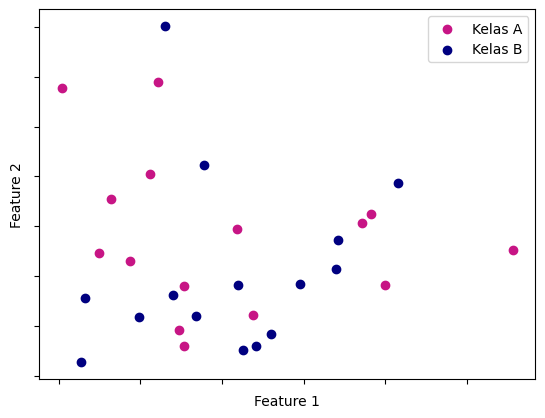

In [4]:
import matplotlib.pyplot as plt

# Define the color for each class
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Group by Label
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Feature 1'], y=class_a['Feature 2'], c=colors['class_a'])
plt.scatter(x=class_b['Feature 1'], y=class_b['Feature 2'], c=colors['class_b'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

Step 3 - Create Multinomial Naive Bayes Model

In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Initiate the MultinomialNB object
mnb = MultinomialNB()

# We can use X and y from data dummy directly

# Split data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fitting model
# Label y should be in 1D arraylike form
mnb.fit(X_train, y_train)

# Make a prediction from train data
y_train_pred = mnb.predict(X_train)

# Make a prediction from test data
y_test_pred = mnb.predict(X_test)

Step 4 - Model Evaluation

In [6]:
from sklearn.metrics import accuracy_score

# training accuracy
acc_train = accuracy_score(y_train, y_train_pred)

# testing accuracy
acc_test = accuracy_score(y_test, y_test_pred)

# Model evaluation on accuracy
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.6666666666666666
Hasil akurasi data test: 0.5555555555555556


Gaussian Naive Bayes Model

In [7]:
from sklearn.naive_bayes import GaussianNB

# Initiati GaussianNB object
gnb = GaussianNB()

# We will use the training and testing data from previous model

# Fit model
gnb.fit(X_train, y_train)

# Make a prediction using training data
y_train_pred_gnb = gnb.predict(X_train)

# Evaluate training data accuracy
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Make a prediction using testing data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluate testing data accuracy
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print model evaluation
print(f'Train Accuracy (Gaussian): {acc_train_gnb}')
print(f'Test Accuracy (Gaussian): {acc_test_gnb}')

Train Accuracy (Gaussian): 0.7619047619047619
Test Accuracy (Gaussian): 0.2222222222222222


# Lab Work 2

Step 1- Load Data

In [8]:
import numpy as np
import pandas as pd

# Load data with specific encoding due data doesn't use utf-8 encoding
df = pd.read_csv('spam.csv', encoding='latin-1')

# Check
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Step 2 - Preprocessing

Step 2.1 - Drop unnecessary Columns

In [9]:
# Drop last 3 columns
df = df.drop(df.iloc[:,2:], axis=1)

# Check
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Step 2.2 - Rename Columns Name

In [10]:
# Rename "v1" and "v2"
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Do renaming columns
df = df.rename(columns=new_cols)

# Check
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Step 2.3 - Data Inspection

In [11]:
# Check data per class
print(df['Labels'].value_counts())
print('\n')

# Check general information
print(df.info())
print('\n')

# Check Descriptive Statistic Information
print(df.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


Step 2.4 - Label Encoding

In [12]:
# Prepare the labels
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode
df['Labels'] = df['Labels'].map(new_labels)

# Check
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Step 2.5 - Split Features and Labels

In [13]:
X = df['SMS'].values
y = df['Labels'].values

Step 3 - Features Extraction

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Initaite CountVectorizer
bow = CountVectorizer()

# Fitting and transform X_train using CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Why just transform? The reason is the same as in the third experiment.
# We don't want the model to know the parameters used by CountVectorizer for fitting the X_train data.
# Thus, the testing data can remain unfamiliar to the model.
X_test = bow.transform(X_test)

Print the transformation result,

In [15]:
print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')

7727
Dimensi data: (4457, 7727)


Training and Evaluation

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Initiate MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Make a prediction using training data
y_pred_train = mnb.predict(X_train)

# Evaluate training data
acc_train = accuracy_score(y_train, y_pred_train)

# Make a prediction using testing data
y_pred_test = mnb.predict(X_test)

# Evaluate testing data
acc_test = accuracy_score(y_test, y_pred_test)

# Print model evaluation
print(f'Training Accuracy: {acc_train}')
print(f'Testing Accuracy: {acc_test}')

Training Accuracy: 0.9946152120260264
Testing Accuracy: 0.9775784753363229


# Lab Work 3

Step 0 - Import Library

In [17]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Step 1 - Create Dummy Data

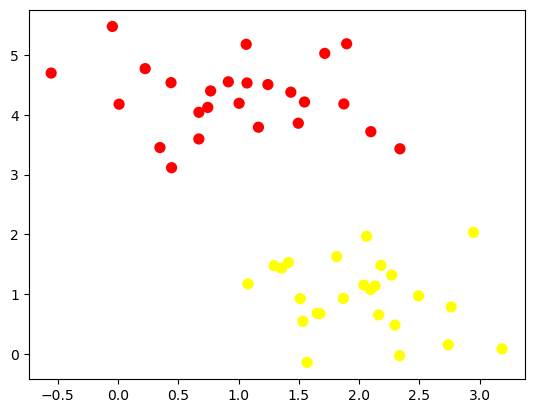

In [18]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Step 2 - Create Decision Boundaries

(-1.0, 3.5)

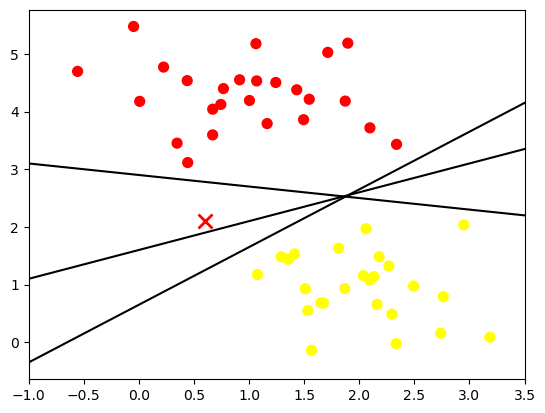

In [19]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

Step 3 - Creating Margins

(-1.0, 3.5)

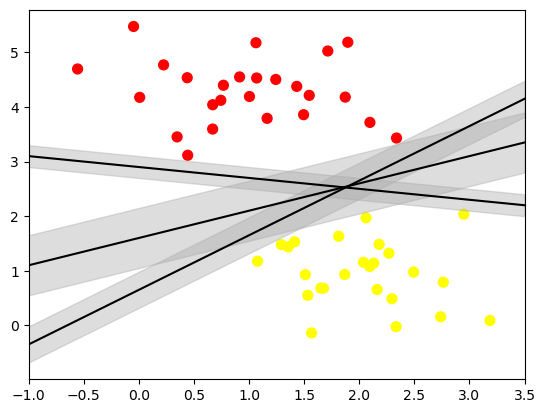

In [20]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

Step 4 - Model Fitting

In [21]:
from sklearn.svm import SVC # "Support vector classifier"

# Initaite SVC object
model = SVC(kernel='linear', C=1E10)

# Fitting
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

Step 4.1 - Visualize Fitting Model

In [22]:
# create a function to plot decision boundary

def plot_svc_decision_function(model, ax=None, plot_support=True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Call the function

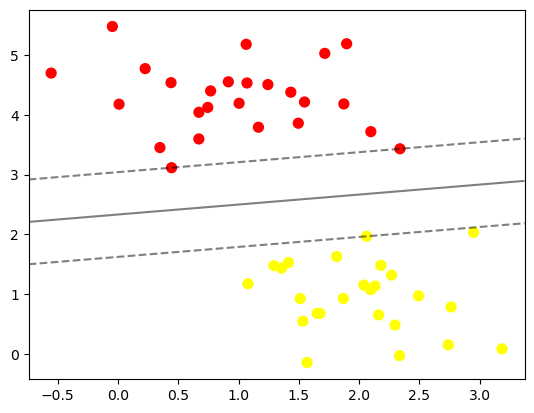

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In order to know which point used as support vector basis, you can use this following code,

In [24]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

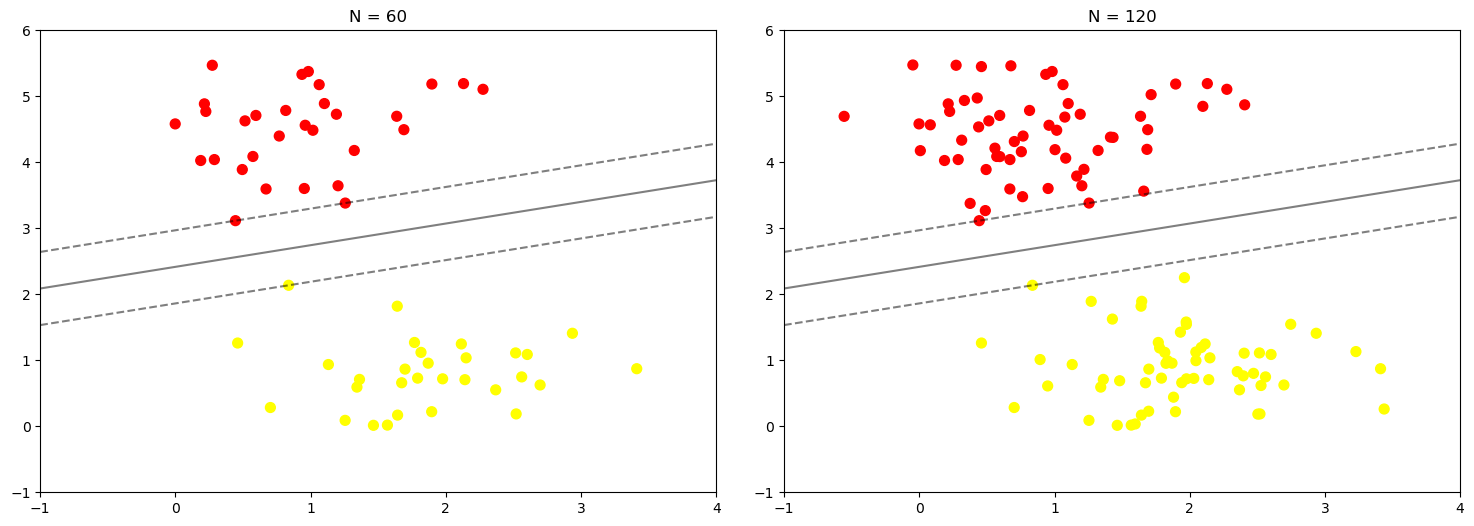

In [25]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

## Non-Linear SVM

Step 1 - Create Dummy Data

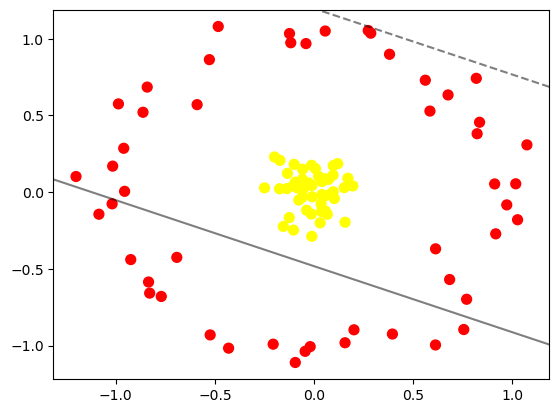

In [26]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [27]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], y, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-1.01616345,  0.16968445],
       [ 0.07884265, -0.01627407],
       [-0.20661772, -0.99057681],
       [ 0.81800027,  0.74193488],
       [-0.48370344,  1.07973699],
       [-0.07710569, -0.05133791],
       [ 0.15627942, -0.1958968 ],
       [-1.20103196,  0.10204331],
       [ 0.05631049,  0.08709338],
       [-0.08376159,  0.02823365],
       [-0.83515466, -0.58535233],
       [-0.07712695,  0.04683576],
       [-0.98714653,  0.57528639],
       [ 0.15592255, -0.98134206],
       [ 0.08506195, -0.0158027 ],
       [-0.59026587,  0.57036105],
       [-0.249973  ,  0.02815192],
       [ 0.75489241, -0.89507206],
       [ 1.02619685, -0.17956287],
       [ 0.68348978, -0.56914717],
       [ 0.03766746, -0.12618604],
       [-0.01394412, -0.14252734],
       [ 1.07338317,  0.30832054],
       [-0.01268187,  0.17511604],
       [-0.19959406,  0.2292142 ],
       [-0.15518533, -0.2234678 ],
       [ 0.17036002,  0.09102907],
       [

Step 2 - Fitting Model

In [28]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

Step 2.1 - Visualize Decision Boundary

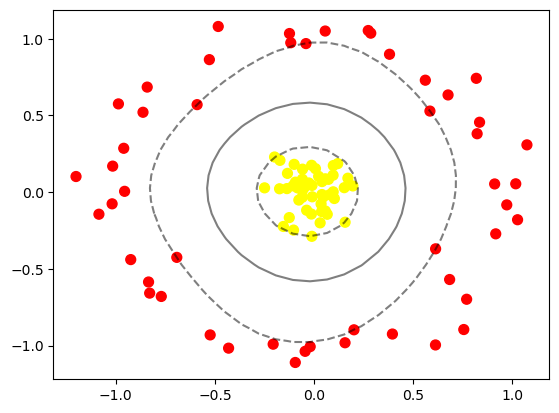

In [29]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

Case on Overlapping Data

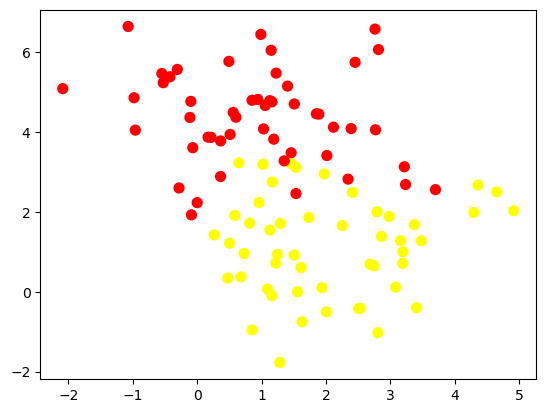

In [30]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

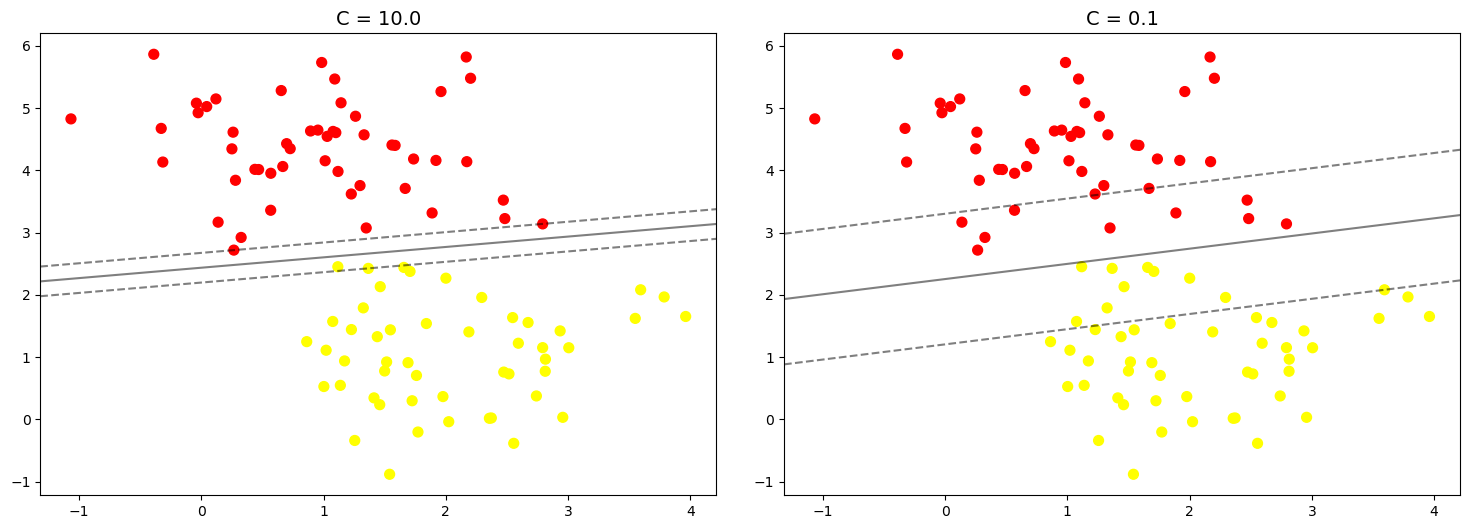

In [31]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# Lab Work 4

Step 1 - Download The Dataset

In [32]:
from sklearn.datasets import fetch_lfw_people

# Store data in 'faces'
faces = fetch_lfw_people(min_faces_per_person=60)

# Check the dataset
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder']
3
(760, 62, 47)


Step 2 - Visualize The Data

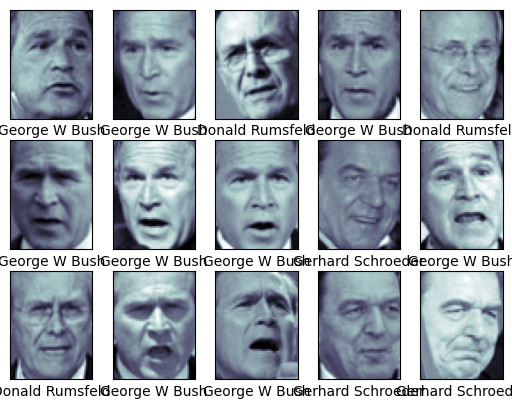

In [33]:
# We will plot some of the data

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Step 3 - Dimensional Reduction and Model Initiation

In [34]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

# Notes that our image size is 62*47=2914
# PCA reduce its dimension to 150
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)

# Intiate the SVM model
svc = SVC(kernel='rbf', class_weight='balanced')

# Create a pipeline -> Dimensional reduction followed by model fitting
model = make_pipeline(pca, svc)

Step 4 - Split Data

In [35]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

Step 5 - Perform Grid Search

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: total: 44 s
Wall time: 22.3 s
{'svc__C': 1, 'svc__gamma': 0.005}
0.8947368421052632


Step 6 - Evaluate The Test Set

In [37]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Step 7 - Visualize The Prediction

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

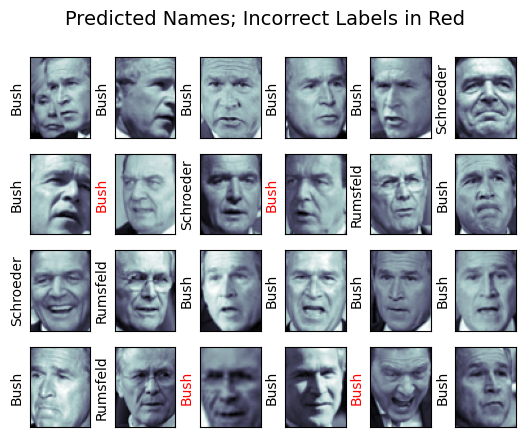

In [38]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

Step 8 - Evaluate The Model

In [39]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

  Donald Rumsfeld       1.00      0.78      0.88        36
    George W Bush       0.88      1.00      0.94       123
Gerhard Schroeder       1.00      0.74      0.85        31

         accuracy                           0.92       190
        macro avg       0.96      0.84      0.89       190
     weighted avg       0.93      0.92      0.91       190



Text(113.92222222222219, 0.5, 'predicted label')

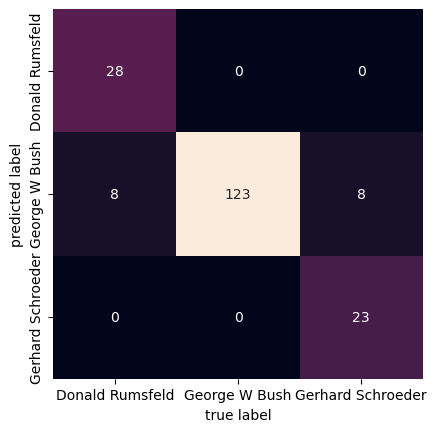

In [40]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Lab Assignment

Step 1 - Load Data

In [41]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Load data with specific encoding due data doesn't use utf-8 encoding
df = pd.read_csv('voice.csv', encoding='latin-1')

# Check
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Step 2 - Dividing label

In [42]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]




Step 3 - Split the data

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 4- Model fitting